In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
UB = np.array([0,2.88,4.64,6.31,7.92,9.58])
TG = np.array([0,2.92,4.7,6.39,8.02,9.71])
AP = np.array([0,2.91,4.71,6.42,8.1,9.84])
d = np.array([0,20,40,60,80,100])

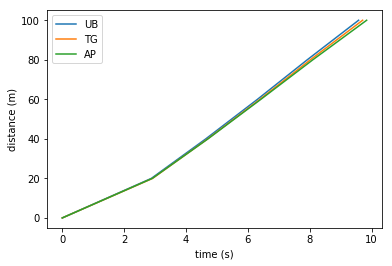

In [3]:
plt.figure()
plt.rcParams['figure.figsize']=10,10
plt.plot(UB,d,TG,d,AP,d)
plt.xlabel('time (s)')
plt.ylabel('distance (m)')
plt.legend(("UB","TG","AP"))
plt.show()

In [4]:
vUB = np.diff(d,1,0)/np.diff(UB,1,0)
vTG = np.diff(d,1,0)/np.diff(TG,1,0)
vAP = np.diff(d,1,0)/np.diff(AP,1,0)


<IPython.core.display.Javascript object>


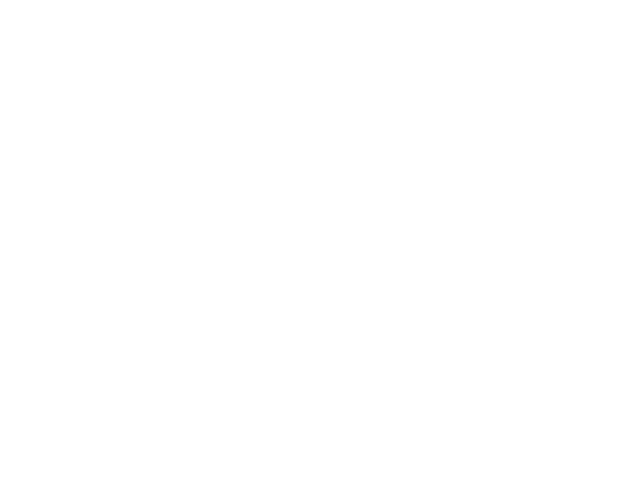

In [5]:
%matplotlib notebook
plt.figure()
plt.plot(UB,3.6*np.hstack((0,vUB)),TG,3.6*np.hstack((0,vTG)),AP,3.6*np.hstack((0,vAP)))
plt.show()

In [6]:
aUB = np.hstack((0,np.diff(vUB,1,0)))/np.diff(UB,1,0)
aTG = np.hstack((0,np.diff(vTG,1,0)))/np.diff(TG,1,0)
aAP = np.hstack((0,np.diff(vAP,1,0)))/np.diff(AP,1,0)

<IPython.core.display.Javascript object>


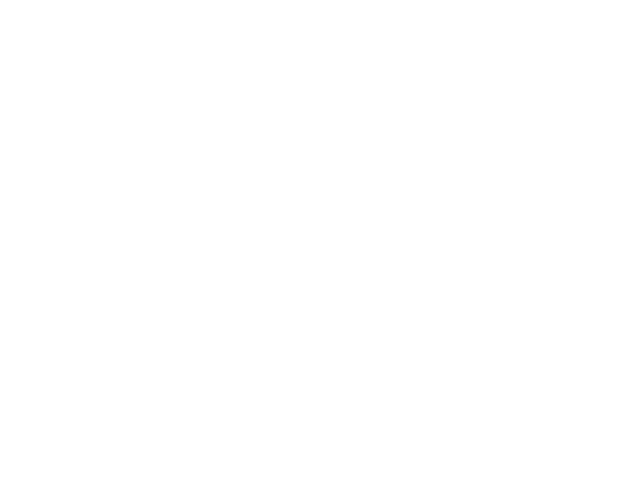

In [7]:
plt.figure()
plt.plot(UB,np.hstack((0,aUB)),TG,np.hstack((0,aTG)),AP,np.hstack((0,aAP)))
plt.show()

<IPython.core.display.Javascript object>


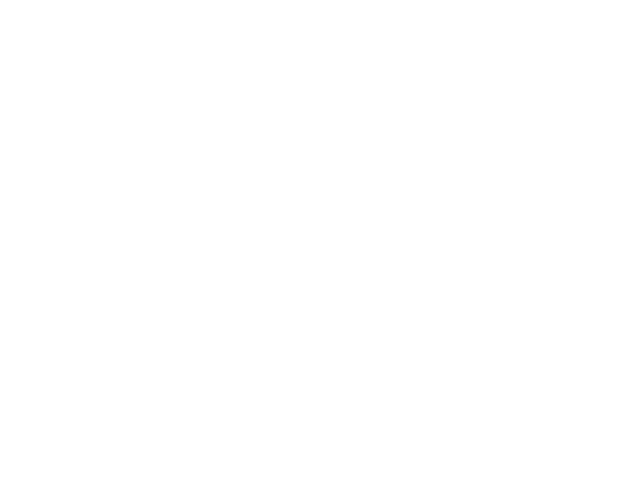

In [8]:
plt.figure()
plt.plot(d,3.6*np.hstack((0,vUB)),d,3.6*np.hstack((0,vTG)),d,3.6*np.hstack((0,vAP)))
plt.show()

<IPython.core.display.Javascript object>


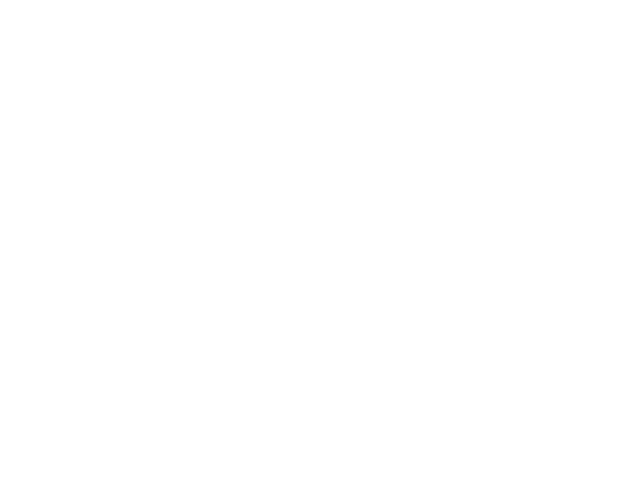

In [9]:
plt.figure()
plt.plot(d,np.hstack((0,aUB)),d,np.hstack((0,aTG)),d,np.hstack((0,aAP)))
plt.show()

In [10]:
import sympy as sym
from sympy.plotting import plot_parametric
sym.init_printing()

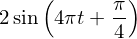

In [11]:
t = sym.symbols('t')
x = 2*sym.sin(4*sym.pi*t+sym.pi/4)
x

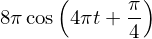

In [12]:
v = sym.diff(x)
v

In [13]:
a = sym.diff(v,t)
a
4*np.pi*np.sqrt(2)

<IPython.core.display.Javascript object>


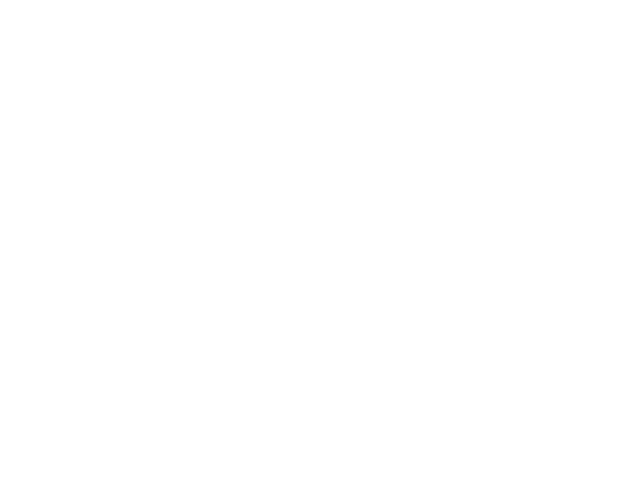

In [14]:
plot_parametric(t,v,(t,0,1))

In [15]:
from sympy.vector import CoordSys3D
O = sym.vector.CoordSys3D(' ')
v = 2*t*O.i+(2*t*sym.exp(-t**2))*O.j

In [16]:
v

In [17]:
r = t**2*O.i+(1-sym.exp(-t**2))*O.j
r

In [18]:
vNorm = sym.sqrt(v.dot(v))
vNorm

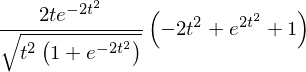

In [19]:
vNormDot = sym.simplify(sym.diff(vNorm,t),100)
vNormDot

In [20]:
float(vNormDot.subs(t,0))

In [21]:
RASIS = np.array([0.5,0.8,0.4])
LASIS = np.array([0.55,0.78,0.1])
RPSIS = np.array([0.3,0.85,0.2])
LPSIS = np.array([0.29,0.78,0.3])

In [22]:
zp = RASIS - LASIS
zp = zp/np.sqrt(np.sum(zp**2))
zp

array([-0.16404468,  0.06561787,  0.98426807])

In [23]:
OP = (RPSIS+LPSIS)/2
OP

array([ 0.295,  0.815,  0.25 ])

In [24]:
va = OP - RASIS

In [25]:
yp = np.cross(va,zp)
yp = yp/np.sqrt(np.sum(yp**2))

In [26]:
xp = np.cross(yp,zp)

In [27]:
Oa = (RASIS+LASIS)/2

In [28]:
zp.dot(zp)

<IPython.core.display.Javascript object>


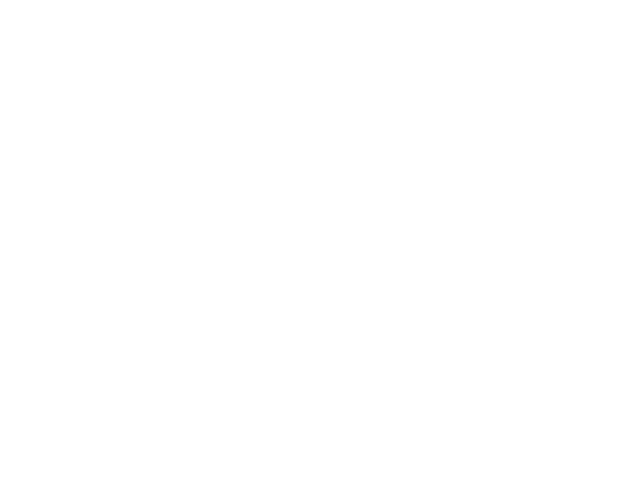

NameError: name 'xs3d' is not defined

In [29]:
from matplotlib.patches import FancyArrowPatch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
fig = plt.figure()
ax = fig.add_axes([0,0,1,1],projection='3d')
xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
vec1 = FancyArrowPatch(Oa,Oa+xp,mutation_scale=20,color='r')
vec2 = FancyArrowPatch(Oa,Oa+yp,mutation_scale=20,color='g')
vec3 = FancyArrowPatch(Oa,Oa+zp,mutation_scale=20,color='b')
ax.add_artist(vec1)
ax.add_artist(vec2)
ax.add_artist(vec3)
ax.view_init(elev=20, azim=60)
plt.show()

In [30]:
import sys
sys.path.insert(1, r'./../functions')  # add to pythonpath
from CCS import CCS

<IPython.core.display.Javascript object>


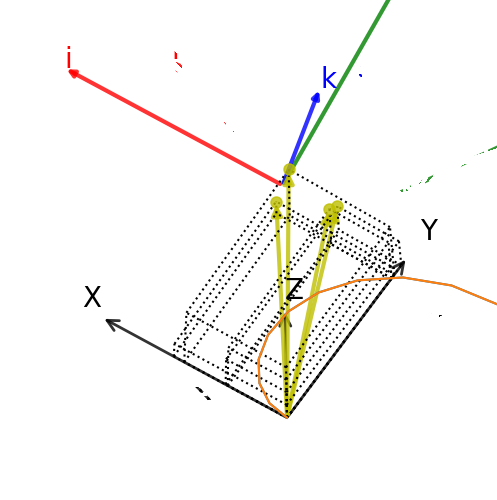

In [31]:
%matplotlib notebook
CCS(xyz=[], Oijk=Oa, ijk=np.vstack((xp, yp, zp)), point=np.vstack((RASIS,RPSIS,LPSIS,LASIS)), vector=True);

In [59]:
t = np.linspace(0,50,500)
theta = t
b = 20
r = theta/b

In [60]:
x = r*np.cos(theta)
y = r*np.sin(theta)

<IPython.core.display.Javascript object>


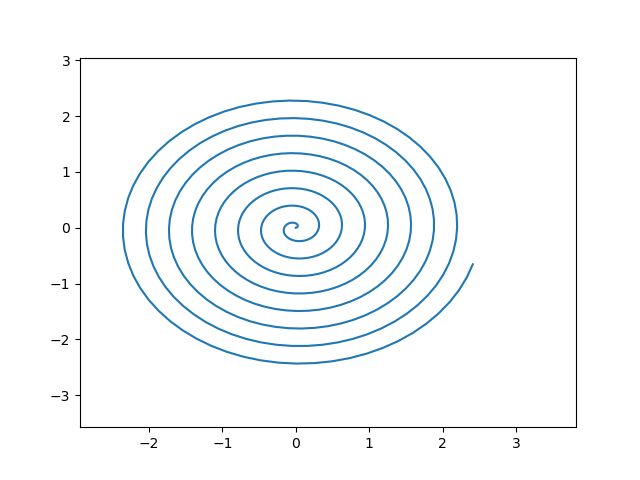

In [61]:
plt.figure()
plt.plot(x,y)
plt.xlim((-30,30))
plt.ylim((-30,30))
plt.show()